In [1]:
# load dataset and procecing (normalization, one-hot encoding)
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist #veri seti
from keras.utils import to_categorical #one-hot encoding
from keras.models import Sequential #sirali base model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #katmanlar
from keras.layers import Flatten, Dense, Dropout #katmanlar
from keras.optimizers import RMSprop #optimizer
from keras.preprocessing.image import ImageDataGenerator #data augmentation (veri artırma)

from sklearn.metrics import classification_report, confusion_matrix #karışıklık matrisi

import warnings 
warnings.filterwarnings("ignore") #uyarıları gizle

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

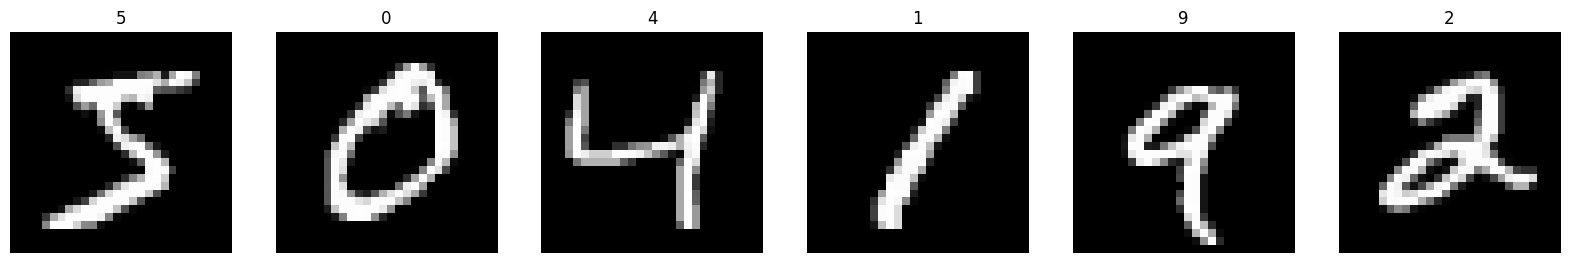

In [3]:
# görselleştirme
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, axes = plt.subplots(1, 6, figsize=(20, 16))
for i in range(6):
    axes[i].imshow(x_train[i], cmap='gray')
    label = class_labels[y_train[i]]
    axes[i].set_title(label)
    axes[i].axis('off')
plt.show()


In [4]:
# veri seti normalizasyonu
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# reshape for gray scale (add channel dimension)
x_train = np.expand_dims(x_train, axis=-1) # (60000, 28, 28) -> (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1) # (10000, 28, 28) -> (10000, 28, 28, 1)

In [6]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=10) # (60000,) -> (60000, 10)
y_test = to_categorical(y_test, num_classes=10) # (10000,) -> (10000, 10)

In [10]:
# Veri arttırımı (data augmentation)
datagen = ImageDataGenerator(
    rotation_range=20, # 0-20 derece döndürme
    width_shift_range=0.2, # %20 yatay kaydırma
    height_shift_range=0.2, # %20 dikey kaydırma
    zoom_range=0.2, # yakınlaştırma
    shear_range=0.2, # kesme
    fill_mode='nearest' # boş alanları doldurma
)
datagen.fit(x_train) # eğitim verisini artırma işlemi için uygun hale getir

In [24]:
# model create, compile and train
model = Sequential() # model oluşturma

#feature extraction (özellik çıkarımı) (convolutional layers)
#32 filtre, 3x3 boyutunda filtre, padding=‘same’ (giriş ve çıkış boyutları aynı), aktivasyon fonksiyonu ReLU, giriş şekli (28, 28, 1) (28x28 gri ölçekli resim)
model.add(Conv2D(32, kernel_size=(3, 3), padding="same" ,activation='relu', input_shape=(28, 28, 1))) # 1. katman (konvolüsyonel katman)
model.add(Conv2D(32, kernel_size=(3, 3),  activation='relu')) # 2. katman (konvolüsyonel katman)
model.add(MaxPooling2D(pool_size=(2, 2))) # 3. katman (max pooling katmanı)
model.add(Dropout(0.25)) # 4. katman (dropout katmanı) (overfitting'i önlemek için)

In [25]:
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu')) # 5. katman (konvolüsyonel katman)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 6. katman (konvolüsyonel katman)
model.add(MaxPooling2D(pool_size=(2, 2))) # 7. katman (max pooling katmanı)
model.add(Dropout(0.30)) # 8. katman (dropout katmanı) (overfitting'i önlemek için)

In [26]:
#classification (sınıflandırma) (fully connected layers)
model.add(Flatten()) # 9. katman (flatten katmanı) (2D'yi 1D'ye çevirir)
model.add(Dense(532, activation='relu')) # 10. katman (fully connected katmanı)
model.add(Dropout(0.5)) # 11. katman (dropout katmanı) (overfitting'i önlemek için)
model.add(Dense(10, activation='softmax')) # 12. katman (output katmanı) (10 sınıf için softmax aktivasyon fonksiyonu)

model.summary() # modelin özetini yazdırma


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                      

In [27]:
model.compile(optimizer=RMSprop(learning_rate= 0.001, decay = 1e-6), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) # modeli derleme (compile)


In [29]:
# test model and evaluate performance
history = model.fit(datagen.flow(x_train, y_train, batch_size=512),
                    epochs= 20,
                     validation_data=(x_test,y_test)) # eğitim verisi ile modeli eğitme

Epoch 1/20
118/118 [==============================] - 24s 135ms/step - loss: 1.3224 - accuracy: 0.5630 - val_loss: 0.2777 - val_accuracy: 0.9146
Epoch 2/20
118/118 [==============================] - 15s 123ms/step - loss: 0.5039 - accuracy: 0.8428 - val_loss: 0.1170 - val_accuracy: 0.9648
Epoch 3/20
118/118 [==============================] - 14s 122ms/step - loss: 0.3098 - accuracy: 0.9050 - val_loss: 0.0980 - val_accuracy: 0.9678
Epoch 4/20
118/118 [==============================] - 14s 122ms/step - loss: 0.2291 - accuracy: 0.9296 - val_loss: 0.0495 - val_accuracy: 0.9842
Epoch 5/20
118/118 [==============================] - 14s 122ms/step - loss: 0.1836 - accuracy: 0.9443 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 6/20
118/118 [==============================] - 15s 124ms/step - loss: 0.1533 - accuracy: 0.9539 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 7/20
118/118 [==============================] - 14s 120ms/step - loss: 0.1338 - accuracy: 0.9580 - val_loss: 0.0314 - val_ac

In [38]:
#modelin test verisi ile test edilmesi
y_pred = model.predict(x_test) # test verisi ile tahmin yapma
y_pred_class =np.argmax(y_pred, axis=1) # tahmin edilen sınıfları alma
y_true_class =np.argmax(y_test, axis=1) # gerçek sınıfları alma

313/313 [==============================] - 1s 3ms/step


In [41]:
report = classification_report(y_true_class, y_pred_class, target_names=class_labels) # sınıflandırma raporu yazdırma

In [42]:
print("Classification Report:\n", report) # sınıflandırma raporunu yazdırma

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



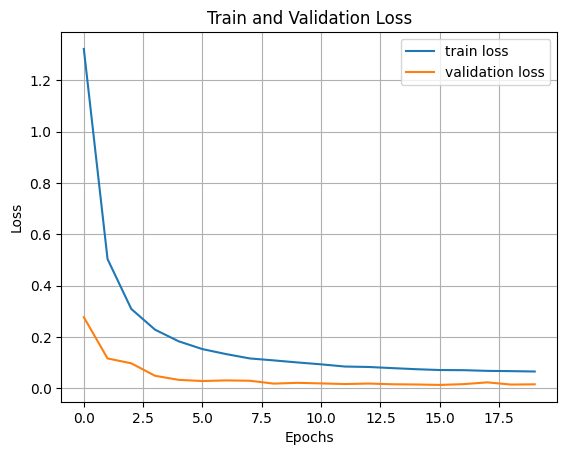

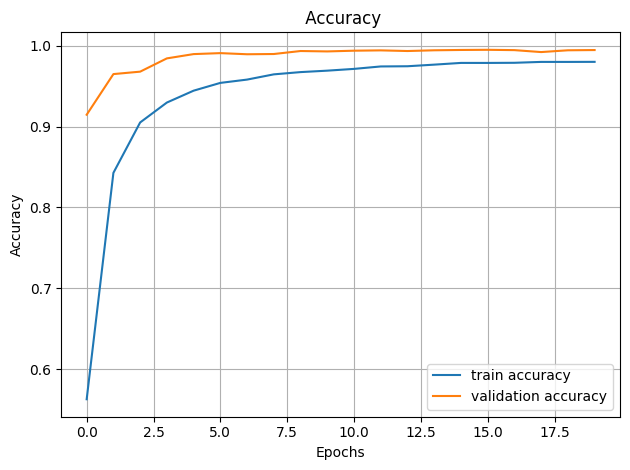

In [43]:
plt.figure()
#loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid(True) # grid ekleme

#accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(' Accuracy')
plt.legend()
plt.grid(True) # grid ekleme
plt.tight_layout()
plt.show() # grafiği gösterme